# K Means Clustering

### Dataset: Online Shoppers Intention Dataset
### Number of attributes: 16
### Number of instances: 12330

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
ds = pd.read_csv("online_shoppers_intention.csv")


### Data Preprocessing

In [21]:
ds.isnull().values.any()

False

### Normalization of Data

In [22]:
ds['Administrative']=(ds['Administrative']-ds['Administrative'].mean())/(ds['Administrative'].std())
ds['Administrative_Duration']=(ds['Administrative_Duration']-ds['Administrative_Duration'].mean())/(ds['Administrative_Duration'].std())
ds['Informational_Duration']=(ds['Informational_Duration']-ds['Informational_Duration'].mean())/(ds['Informational_Duration'].std())
ds['ProductRelated']=(ds['ProductRelated']-ds['ProductRelated'].mean())/(ds['ProductRelated'].std())
ds['ProductRelated_Duration']=(ds['ProductRelated_Duration']-ds['ProductRelated_Duration'].mean())/(ds['ProductRelated_Duration'].std())
ds['PageValues']=(ds['PageValues']-ds['PageValues'].mean())/(ds['PageValues'].std())

In [23]:
X = np.array([ds['Administrative'],ds['Administrative_Duration'],ds['Informational'],ds['Informational_Duration'],ds['ProductRelated'],ds['ProductRelated_Duration'],ds['BounceRates'],ds['ExitRates'],ds['PageValues'],ds['SpecialDay'],ds['OperatingSystems'],ds['Browser'],ds['Region'],ds['TrafficType'],ds['Weekend'],ds['Revenue']])

In [24]:
print(np.shape(X))
X = X.T
print(np.shape(X))
X=np.matrix(X)

(16, 12330)
(12330, 16)


### Function to calculate Euclidean Distance
Euclidean distance is used as a distance measure for the algorithm.

In [25]:
def computeDistance(x1,x2):
    d=np.sqrt(np.sum(np.power((x1-x2),2)))
    return d

### Random Initialization of centroids among the samples

In [26]:
def randomInit(X,no_of_clusters,no_of_samples,nof):
    centroids = []
    for i in range(no_of_clusters):
        temp = np.random.randint(0,no_of_samples)
        tempcents = []
        for j in range(nof):
            tempcents.append(X[temp,j])
        centroids.append(tempcents)
    centroids = np.matrix(centroids)
    return centroids



### Label / Assign the given data sample to the nearest centroid
Every data sample point is assigned to the nearest centroid determined by Euclidean Distance.

In [27]:
def labelling(x,centroids):
    distances = {}
    for i in range(len(centroids)):
        distances[computeDistance(x,centroids[i,:])] = i
    return distances[min(distances.keys())]

### Assign centroids for all data samples

In [28]:
def clusterAssignment(X,clusters,centroids):
    for i in range(len(X)):
        clusters[i] = labelling(X[i,:],centroids)
    return clusters

The mean of all the points(data samples) assigned to a particular centroid is computed.

The mean is then set as the new Centroid.

In [29]:
def updateCentroid(X,clusters,centroids,nof):
    sums = np.matrix(np.zeros(centroids.shape))
    count = np.zeros(len(centroids),dtype=int)
    newCentroids = np.matrix(np.zeros(centroids.shape))
    for i in range(len(X)):
        for j in range(nof):
            sums[clusters[i],j]+=X[i,j]
        count[clusters[i]]+=1
    for i in range(len(centroids)):
        newCentroids[i,:] = sums[i,:]/count[i]
    return newCentroids

 _K-Means_ Algorithm<br>
 The following steps are followed until convergence or for specified number of iterations.<br>
1. Cluster Assignment : Assign every point to its nearest centroid (_clusterAssignment_ function).
2. Update the Centroids : Compute the mean of each cluster and update it as the new centroid. (_updateCentroid_ function).    

In [30]:
def kmeans_call(X,clusters,centroids,iterations,nof): 
    for i in range(iterations):
        clusters = clusterAssignment(X,clusters,centroids)
        new_centroids = updateCentroid(X,clusters,centroids,nof)     
        centroids = new_centroids
        
    return centroids,clusters    

In [31]:
number_of_samples = 12230
number_of_iterations = 100
number_of_features = 16

### Calculating optimum value of K
Plot the graphs for different values of K to obtain the optimum value of K using the elbow curve

[255785.95675696 211574.180917   193524.17031007 173590.97562519]


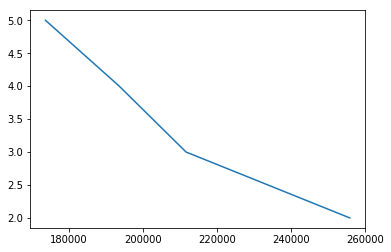

In [32]:
plt.figure()
k=[2,3,4,5]

s=np.zeros(len(k))
for j in range(len(k)):
    centroids = randomInit(X,k[j],number_of_samples,number_of_features)
    clusters = np.zeros(len(X),dtype=int)
    (finalCentroids,finalClusters) = kmeans_call(X,clusters,centroids,number_of_iterations,number_of_features)
    for i in range(len(X)):
        s[j]+=np.sum(np.power(X[i,:]-finalCentroids[finalClusters[i],:],2))
print(s)    
plt.plot(s,k)
plt.show()

In [33]:
number_of_clusters = 3

In [34]:
centroids = randomInit(X,number_of_clusters,number_of_samples,number_of_features) 
clusters = np.zeros(len(X),dtype=int)

In [35]:
(finalCentroids,finalClusters) = kmeans_call(X,clusters,centroids,number_of_iterations,number_of_features)

In [36]:
print(finalCentroids,finalClusters, len(finalCentroids),len(finalClusters))

[[ 1.38113770e+00  1.17720560e+00  2.89248120e+00  1.46010585e+00
   1.44056910e+00  1.36061313e+00  6.47494756e-03  2.01274744e-02
   1.88797324e-01  3.02255639e-02  2.09548872e+00  2.19699248e+00
   2.63007519e+00  2.39473684e+00  2.49624060e-01  2.77443609e-01]
 [-8.48920867e-02 -3.93331679e-02  3.73557692e-01 -8.71927315e-02
  -8.39642568e-02 -6.73122921e-02  3.02225179e-02  5.10775126e-02
   1.20189029e-03  6.18269231e-02  2.40000000e+00  2.55913462e+00
   3.28798077e+00  1.20408654e+01  2.46634615e-01  1.55769231e-01]
 [-1.86136502e-01 -1.66353191e-01  1.77690583e-01 -1.97374429e-01
  -1.95214266e-01 -1.87175549e-01  2.26620183e-02  4.46274472e-02
  -2.84305351e-02  6.59865471e-02  2.06390135e+00  2.33385650e+00
   3.19170404e+00  2.46053812e+00  2.26793722e-01  1.36210762e-01]] [2 2 2 ... 1 1 2] 3 12330
